**Data set link** [Face Mask](https://www.kaggle.com/ashishjangra27/face-mask-12k-images-dataset)

In [1]:
!pip install kaggle
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [2]:
import os
import zipfile
import tensorflow as tf
from tensorflow import keras
from keras import preprocessing
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)

2.18.0


In [3]:
!kaggle datasets download --force ashishjangra27/face-mask-12k-images-dataset

Dataset URL: https://www.kaggle.com/datasets/ashishjangra27/face-mask-12k-images-dataset
License(s): CC0-1.0
100% 330M/330M [00:11<00:00, 33.7MB/s]
100% 330M/330M [00:11<00:00, 28.9MB/s]


In [4]:
local_dir='/content/face-mask-12k-images-dataset.zip'
zip_ref=zipfile.ZipFile(local_dir,'r')
zip_ref.extractall('/tmp')
zip_ref.close

<bound method ZipFile.close of <zipfile.ZipFile filename='/content/face-mask-12k-images-dataset.zip' mode='r'>>

In [6]:
train_dir=os.path.join('/tmp/Face Mask Dataset/Train')
validation_dir=os.path.join('/tmp/Face Mask Dataset/Validation')
test_dir=os.path.join('/tmp/Face Mask Dataset/Test')

# Model 1: CNN

In [8]:
model=keras.models.Sequential([
                               keras.layers.Conv2D(32,(3,3),activation='relu',padding='valid',input_shape=(224,224,3)),
                               keras.layers.MaxPool2D(pool_size=(2,2)),
                               keras.layers.Conv2D(64,(3,2),activation='relu',padding='valid'),
                               keras.layers.MaxPool2D(pool_size=(2,2)),
                               keras.layers.Conv2D(128,(3,3),activation='relu',padding='valid'),
                               keras.layers.MaxPool2D(pool_size=(2,2)),
                               keras.layers.Conv2D(256,(3,3),activation='relu',padding='valid'),
                               keras.layers.MaxPool2D(pool_size=(2,2)),
                               keras.layers.Conv2D(512,(3,3),activation='relu',padding='valid'),
                               keras.layers.MaxPool2D(pool_size=(2,2)),



                              tf.keras.layers.Dropout(0.5),


                               keras.layers.Flatten(),
                               keras.layers.Dense(units=512,activation=tf.nn.relu),

                               keras.layers.Dense(units=256,activation=tf.nn.relu),

                               keras.layers.Dense(units=128,activation=tf.nn.relu),

                               keras.layers.Dense(units=64,activation=tf.nn.relu),

                               keras.layers.Dense(units=32,activation=tf.nn.relu),


                               keras.layers.Dense(units=1,activation=tf.nn.sigmoid)
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])


model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 109, 110, 64)        │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 54, 55, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 52, 53, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 10, 10, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 5, 5, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 5, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │       6,554,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,291,137 (31.63 MB)

 Trainable params: 8,291,137 (31.63 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
train_data_generator=ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')
validation_data_generator=ImageDataGenerator(
     rescale=1./255
)
test_data_generator=ImageDataGenerator(
     rescale=1./255
)
train_generator = train_data_generator.flow_from_directory(train_dir,
                                                    batch_size=200,
                                                    class_mode='binary',
                                                    target_size=(224,224))
validation_generator =validation_data_generator.flow_from_directory(validation_dir,
                                                         batch_size=200,
                                                         class_mode  = 'binary',
                                                         target_size = (224,224))
test_generator =test_data_generator.flow_from_directory(test_dir,
                                                         batch_size=200,
                                                         class_mode  = 'binary',
                                                         target_size = (224,224))

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


In [11]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=5,
                              epochs=5,
                              validation_steps=5,
                              verbose=1)

Epoch 1/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 209s 44s/step - accuracy: 0.8144 - loss: 0.4392 - val_accuracy: 0.9125 - val_loss: 0.2823
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 195s 41s/step - accuracy: 0.8732 - loss: 0.3546 - val_accuracy: 0.6075 - val_loss: 0.7917
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 199s 40s/step - accuracy: 0.7546 - loss: 0.5319 - val_accuracy: 0.8900 - val_loss: 0.3014
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 195s 41s/step - accuracy: 0.8817 - loss: 0.3315 - val_accuracy: 0.8712 - val_loss: 0.3074
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 192s 40s/step - accuracy: 0.8328 - loss: 0.3784 - val_accuracy: 0.9038 - val_loss: 0.2704


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc,  label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')

plt.plot(epochs, loss,  label='Training Loss')
plt.plot(epochs, val_loss,  label='Validation Loss')
plt.title('Training and validation loss and accuracy comparison')
plt.legend()

plt.show()

In [12]:
scores = model.evaluate(test_generator, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

5/5 ━━━━━━━━━━━━━━━━━━━━ 41s 8s/step - accuracy: 0.8970 - loss: 0.2832
Accuracy: 89.82%


In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
# Get true labels
y_true_prob = test_generator.classes  # Actual class labels
y_true = (y_true_prob > 0.5).astype(int)

# Get predictions
y_pred_prob = model.predict(test_generator)  # Get predicted probabilities
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert to binary labels (0 or 1)

# Compute metrics
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Print results
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=['Without Mask', 'With Mask']))

5/5 ━━━━━━━━━━━━━━━━━━━━ 41s 8s/step
Precision: 0.5017
Recall: 0.5894
F1 Score: 0.5420

Classification Report:
              precision    recall  f1-score   support

Without Mask       0.47      0.38      0.42       483
   With Mask       0.50      0.59      0.54       509

    accuracy                           0.49       992
   macro avg       0.49      0.49      0.48       992
weighted avg       0.49      0.49      0.48       992



Saving Picture2.png to Picture2 (1).png
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 761ms/step
[1.]
Picture2 (1).png is Without Mask


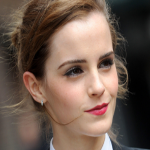

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
from IPython.display import Image
import cv2
from google.colab.patches import cv2_imshow

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224, 224))

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    temp_path='/content/' + fn
    print(fn + " is Without Mask")
    img = cv2.imread(temp_path)
    imS=cv2.resize(img, (224, 224))
    cv2_imshow(imS)
  else:
    temp_path='/content/' + fn
    print(fn + " is With Mask")
    img = cv2.imread(temp_path)
    imS=cv2.resize(img, (224, 224))
    cv2_imshow(imS)


In [ ]:
model.save_weights("Facemask.weights.h5")

# Model 2: VGG16

In [20]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
INPUT_SIZE = [224,224]
BATCH = 32

vgg16 = VGG16(input_shape=INPUT_SIZE + [3], weights='imagenet', include_top=False)
for layer in vgg16.layers:
    layer.trainable = False

flatten = Flatten()(vgg16.output)
dense_1 = Dense(units=256, activation='relu')(flatten)
dense_2 = Dense(units=128, activation='relu')(dense_1)
dense_3 = Dense(units=64, activation='relu')(dense_2)
dense_4 = Dense(units=32, activation='relu')(dense_3)
dense_output = Dense(units=1, activation='sigmoid')(dense_4)

model2 = Model(inputs=vgg16.input, outputs=dense_output)
model2.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)
model2.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 21,180,737 (80.80 MB)

 Trainable params: 6,466,049 (24.67 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [21]:
train_data_generator=ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')
validation_data_generator=ImageDataGenerator(
     rescale=1./255
)
test_data_generator=ImageDataGenerator(
     rescale=1./255

)
train_generator = train_data_generator.flow_from_directory(train_dir,
                                                    batch_size=200,
                                                    class_mode='binary',
                                                    target_size=(224,224))
validation_generator =validation_data_generator.flow_from_directory(validation_dir,
                                                         batch_size=200,
                                                         class_mode  = 'binary',
                                                         target_size = (224,224))
test_generator =test_data_generator.flow_from_directory(test_dir,shuffle = False,
                                                         batch_size=200,
                                                         class_mode  = 'binary',
                                                         target_size = (224,224))

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


In [ ]:
history2= model2.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=5,
                              epochs=5,
                              validation_steps=5,
                              verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
2/5 ━━━━━━━━━━━━━━━━━━━━ 6:07 122s/step - accuracy: 0.4750 - loss: 0.7821

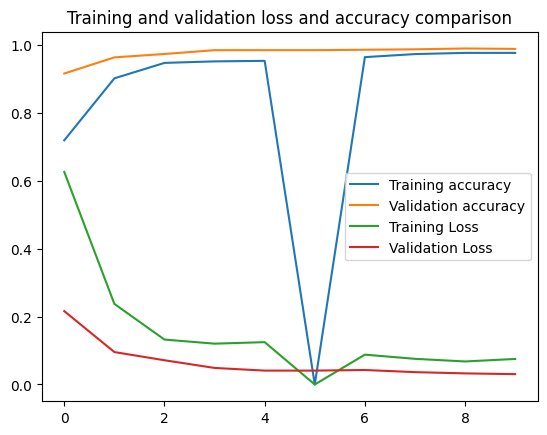

In [ ]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc,  label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')

plt.plot(epochs, loss,  label='Training Loss')
plt.plot(epochs, val_loss,  label='Validation Loss')
plt.title('Training and validation loss and accuracy comparison')
plt.legend()

plt.show()

In [ ]:
scores = model2.evaluate(test_generator, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 904ms/step - accuracy: 0.9920 - loss: 0.0229
Accuracy: 99.40%


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
# Get true labels
y_true_prob = test_generator.classes  # Actual class labels
y_true = (y_true_prob > 0.5).astype(int)

# Get predictions
y_pred_prob = model2.predict(test_generator)  # Get predicted probabilities
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert to binary labels (0 or 1)

# Compute metrics
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Print results
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=['Without Mask', 'With Mask']))

5/5 ━━━━━━━━━━━━━━━━━━━━ 41s 8s/step
Precision: 0.5017
Recall: 0.5894
F1 Score: 0.5420

Classification Report:
              precision    recall  f1-score   support

Without Mask       0.47      0.38      0.42       483
   With Mask       0.50      0.59      0.54       509

    accuracy                           0.49       992
   macro avg       0.49      0.49      0.48       992
weighted avg       0.49      0.49      0.48       992



In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
from IPython.display import Image
import cv2
from google.colab.patches import cv2_imshow

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224, 224))

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model2.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    temp_path='/content/' + fn
    print(fn + " is Without Mask")
    img = cv2.imread(temp_path)
    imS=cv2.resize(img, (224, 224))
    cv2_imshow(imS)
  else:
    temp_path='/content/' + fn
    print(fn + " is With Mask")
    img = cv2.imread(temp_path)
    imS=cv2.resize(img, (224, 224))
    cv2_imshow(imS)


# Model 3: InceptionV3

In [ ]:
from keras.applications.inception_v3 import InceptionV3

In [ ]:
INPUT_SIZE = [224,224]

Inception = InceptionV3(input_shape=INPUT_SIZE + [3], weights='imagenet', include_top=False)
for layer in Inception.layers:
    layer.trainable = False

flatten = Flatten()(Inception.output)
dense_1 = keras.layers.Dense(units=256, activation='relu')(flatten)
dense_2 = keras.layers.Dense(units=128, activation='relu')(dense_1)
dense_3 = keras.layers.Dense(units=64, activation='relu')(dense_2)
dense_4 = keras.layers.Dense(units=32, activation='relu')(dense_3)
dense_output = Dense(units=1, activation='sigmoid')(dense_4)
model3 = Model(inputs=Inception.input, outputs=dense_output)
model3.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)
model3.summary()


Model: "functional_281"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_45            │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1871 (Conv2D)      │ (None, 111, 111, 32)   │            864 │ input_layer_45[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1786  │ (None, 111, 111, 32)   │             96 │ conv2d_1871[0][0]      │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1786           │ (None, 111, 111, 32)   │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1872 (Conv2D)      │ (None, 109, 109, 32)   │          9,216 │ activation_1786[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1787  │ (None, 109, 109, 32)   │             96 │ conv2d_1872[0][0]      │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1787           │ (None, 109, 109, 32)   │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1873 (Conv2D)      │ (None, 109, 109, 64)   │         18,432 │ activation_1787[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1788  │ (None, 109, 109, 64)   │            192 │ conv2d_1873[0][0]      │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1788           │ (None, 109, 109, 64)   │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_161         │ (None, 54, 54, 64)     │              0 │ activation_1788[0][0]  │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1874 (Conv2D)      │ (None, 54, 54, 80)     │          5,120 │ max_pooling2d_161[0][… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1789  │ (None, 54, 54, 80)     │            240 │ conv2d_1874[0][0]      │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1789           │ (None, 54, 54, 80)     │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1875 (Conv2D) 

 Total params: 34,953,505 (133.34 MB)

 Trainable params: 13,150,721 (50.17 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [ ]:
history3= model3.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=10,
                              epochs=10,
                              validation_steps=10,
                              verbose=1)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 66s 4s/step - accuracy: 0.7251 - loss: 1.3715 - val_accuracy: 0.9950 - val_loss: 0.0200
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.9562 - loss: 0.2772 - val_accuracy: 0.9912 - val_loss: 0.0335
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.9623 - loss: 0.1473 - val_accuracy: 0.9900 - val_loss: 0.0239
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step - accuracy: 0.9792 - loss: 0.0877 - val_accuracy: 0.9900 - val_loss: 0.0395
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.9591 - loss: 0.1521 - val_accuracy: 0.9950 - val_loss: 0.0118
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 224ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9950 - val_loss: 0.0118
Epoch 7/10


In [ ]:
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc,  label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')

plt.plot(epochs, loss,  label='Training Loss')
plt.plot(epochs, val_loss,  label='Validation Loss')
plt.title('Training and validation loss and accuracy comparison')
plt.legend()

plt.show()

In [ ]:
scores = model3.evaluate(test_generator, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
# Get true labels
y_true_prob = test_generator.classes  # Actual class labels
y_true = (y_true_prob > 0.5).astype(int)

# Get predictions
y_pred_prob = model3.predict(test_generator)  # Get predicted probabilities
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert to binary labels (0 or 1)

# Compute metrics
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Print results
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=['Without Mask', 'With Mask']))

5/5 ━━━━━━━━━━━━━━━━━━━━ 41s 8s/step
Precision: 0.5017
Recall: 0.5894
F1 Score: 0.5420

Classification Report:
              precision    recall  f1-score   support

Without Mask       0.47      0.38      0.42       483
   With Mask       0.50      0.59      0.54       509

    accuracy                           0.49       992
   macro avg       0.49      0.49      0.48       992
weighted avg       0.49      0.49      0.48       992



In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
from IPython.display import Image
import cv2
from google.colab.patches import cv2_imshow

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224, 224))

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model3.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    temp_path='/content/' + fn
    print(fn + " is Without Mask")
    img = cv2.imread(temp_path)
    imS=cv2.resize(img, (224, 224))
    cv2_imshow(imS)
  else:
    temp_path='/content/' + fn
    print(fn + " is With Mask")
    img = cv2.imread(temp_path)
    imS=cv2.resize(img, (224, 224))
    cv2_imshow(imS)
